In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [12]:
cd code

[Errno 2] No such file or directory: 'code'
/Users/kazi/Desktop/syntaxerror-mlpp2018/code


In [13]:

import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

In [14]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')

# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')



LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 
DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'pri_dx_value', 'refferal_source', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [5]:
df.columns

Index(['booking_date', 'bailed_out', 'mh_treatment', 'within_one',
       'within_two', 'sexFEMALE', 'sexMALE', 'sexmissing',
       'raceAMERICAN INDIAN OR ALASKA NATIVE', 'raceASIAN',
       ...
       'retirement_income_bin3', 'retirement_income_bin4',
       'rent_over_income_bin1', 'rent_over_income_bin2',
       'rent_over_income_bin3', 'rent_over_income_bin4', 'bail_amt_bin1',
       'bail_amt_bin2', 'bail_amt_bin3', 'bail_amt_bin4'],
      dtype='object', length=114)

In [5]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)

# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

In [7]:
final_options.person_societal_var

['mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'age_bin1',
 'age_bin2',
 'age_bin3',
 'age_bin4',
 'own_children_under18_bin1',
 'own_children_under18_bin2',
 'own_children_under18_bin3',
 'own_children_under18_bin4',
 'grandparent_care_bin1',
 'grandparent_care_bin2',
 'grandparent_care_bin3',
 'grandparent_care_bin4',
 'military_service_bin1',
 'military_service_bin2',
 'military_service_bin3',
 'military_service_bin4',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'per_capita_income_bin1',
 'per_capita_income_bin2',
 'per_capita_income_bin3',
 'per_capita_income_bin4',
 'poverty_stat_bin1',
 'poverty_stat_bin2',
 'poverty_stat_bin3',
 'poverty_stat_bin4',
 'household_income_bin1',
 'household_income_bin2',
 'household_income_bin3',
 'household_income_bin4',
 'mortgage_stat_bin1',
 'mortgage_stat_bin2'

In [15]:
#Running on Unbiased set of personal data and census data
x_train = x_train[final_options.person_societal_var]
x_test = x_test[final_options.person_societal_var]

In [16]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [17]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
34,Bag,"{'max_features': 10, 'max_samples': 5, 'n_esti...",0.5429,0.2173,0.0445,"(0.5055, 0.1264, 0.2022)","(0.272, 0.136, 0.1813)","(0.2404, 0.2404, 0.2404)"
23,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 1000}",0.5774,0.2481,12.1746,"(0.3187, 0.0797, 0.1275)","(0.2637, 0.1319, 0.1758)","(0.2734, 0.2734, 0.2734)"
97,ET,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.5928,0.2577,1.0084,"(0.3022, 0.0755, 0.1209)","(0.3187, 0.1593, 0.2125)","(0.3022, 0.3022, 0.3022)"
49,Logit,"{'C': 10, 'penalty': 'l2'}",0.5851,0.2518,0.2704,"(0.3077, 0.0769, 0.1231)","(0.2692, 0.1346, 0.1795)","(0.2816, 0.2816, 0.2816)"
114,NB,{},0.5522,0.2328,0.0332,"(0.3352, 0.0838, 0.1341)","(0.2665, 0.1332, 0.1777)","(0.2266, 0.2266, 0.2266)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.5943,0.2609,1.1618,"(0.3407, 0.0852, 0.1363)","(0.3187, 0.1593, 0.2125)","(0.2871, 0.2871, 0.2871)"
64,Tree,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.5943,0.2471,0.0196,"(0.2692, 0.0673, 0.1077)","(0.2885, 0.1442, 0.1923)","(0.2912, 0.2912, 0.2912)"


In [12]:
#best2 = final_classifier_final.best_grid(results_2)

In [13]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'],best )

Bag
Boost
ET
Logit
NB
RF
Tree


In [14]:
df_sorting.columns

Index(['mar_statA', 'mar_statD', 'mar_statM', 'mar_statN', 'mar_statS',
       'mar_statU', 'mar_statW', 'mar_statY', 'mar_statmissing', 'age_bin1',
       'age_bin2', 'age_bin3', 'age_bin4', 'own_children_under18_bin1',
       'own_children_under18_bin2', 'own_children_under18_bin3',
       'own_children_under18_bin4', 'grandparent_care_bin1',
       'grandparent_care_bin2', 'grandparent_care_bin3',
       'grandparent_care_bin4', 'military_service_bin1',
       'military_service_bin2', 'military_service_bin3',
       'military_service_bin4', 'raceAMERICAN INDIAN OR ALASKA NATIVE',
       'raceASIAN', 'raceBLACK OR AFRICAN AMERICAN', 'raceWHITE', 'sexFEMALE',
       'sexMALE', 'sexmissing', 'per_capita_income_bin1',
       'per_capita_income_bin2', 'per_capita_income_bin3',
       'per_capita_income_bin4', 'poverty_stat_bin1', 'poverty_stat_bin2',
       'poverty_stat_bin3', 'poverty_stat_bin4', 'household_income_bin1',
       'household_income_bin2', 'household_income_bin3',
       '

In [15]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)


In [16]:
RF_df.columns

Index(['mar_statA', 'mar_statD', 'mar_statM', 'mar_statN', 'mar_statS',
       'mar_statU', 'mar_statW', 'mar_statY', 'mar_statmissing', 'age_bin1',
       'age_bin2', 'age_bin3', 'age_bin4', 'own_children_under18_bin1',
       'own_children_under18_bin2', 'own_children_under18_bin3',
       'own_children_under18_bin4', 'grandparent_care_bin1',
       'grandparent_care_bin2', 'grandparent_care_bin3',
       'grandparent_care_bin4', 'military_service_bin1',
       'military_service_bin2', 'military_service_bin3',
       'military_service_bin4', 'raceAMERICAN INDIAN OR ALASKA NATIVE',
       'raceASIAN', 'raceBLACK OR AFRICAN AMERICAN', 'raceWHITE', 'sexFEMALE',
       'sexMALE', 'sexmissing', 'per_capita_income_bin1',
       'per_capita_income_bin2', 'per_capita_income_bin3',
       'per_capita_income_bin4', 'poverty_stat_bin1', 'poverty_stat_bin2',
       'poverty_stat_bin3', 'poverty_stat_bin4', 'household_income_bin1',
       'household_income_bin2', 'household_income_bin3',
       '

In [17]:
RF_df[:200]

,mar_statA,mar_statD,mar_statM,mar_statN,mar_statS,mar_statU,mar_statW,mar_statY,mar_statmissing,age_bin1,...,education_25_bin2,education_25_bin3,education_25_bin4,Bag,Boost,ET,Logit,NB,RF,Tree
948,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0.215000,0.500099,0.925000,0.594901,1.000000,0.966667,0.341783
3837,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0.256667,0.499759,1.000000,0.304684,1.000000,0.866816,0.308590
2595,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0.256667,0.499759,1.000000,0.304684,1.000000,0.866816,0.308590
22709,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0.060000,0.499610,0.919444,0.176644,1.000000,0.849563,0.233095
22489,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0.511667,0.499581,0.923077,0.152682,1.000000,0.820398,0.249423
22488,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0.511667,0.499581,0.923077,0.152682,1.000000,0.820398,0.249423
23139,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0.133333,0.499946,0.909524,0.444271,1.000000,0.804603,0.341783
8468,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.286667,0.499801,0.769231,0.309573,1.000000,0.804190,0.317629
8912,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.286667,0.499801,0.769231,0.309573,1.000000,0.804190,0.317629
8467,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.286667,0.499801,0.769231,0.309573,1.000000,0.804190,0.317629


In [18]:
def plotting_curves (dataframe, feature):
    '''
    Given a dataframe, a column name, 
        displays a plot of that dataframe column distribution.
        
    Input:
        dataframe
        feature: column name (string)
        
    Return:
        displays a distribution of that variable
        
    Inspired by:
        https://seaborn.pydata.org/generated/seaborn.distplot.html
    '''
    title = feature + ' Graph'
    ax = sns.distplot(dataframe[feature])
    ax.set_title(title)


In [19]:
value_counter (RF_df[:200], 'bail_a

NameError: name 'value_counter' is not defined

In [21]:
def value_counter (dataframe, feature):
    '''
    Given a dataframe, and feature,
        gives the number of occurrences of each value in that feature column
        
    Input:
        dataframe
        feature: string
    
    Output: dataframe
    '''
    return dataframe[feature].value_counts()

In [22]:
viz_df = final_load_dfs.load_from_file('FINAL.csv')
train, test = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)
y = ['within_one', 'within_two']
x_, viz_x_test, y_, _y_ = final_temporal.split_data(train, test, y)

LoadedFINAL.csv


In [23]:
def finding_risk_scores(x_train, x_test, y_train, y_test, grid, dataframe_copy):
    '''
    Adds the y-pred probs for each model to the x_test
    Can be used to find top X% of people at risk according to any given model
    '''
    models = []
    for row in grid:
        models.append(row)
    
    #x_test_copy = x_test.copy()
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = grid[models[index]]
        for p in ParameterGrid(model_params):
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                name = str(models[index])
                print (name)
                dataframe_copy[name] = y_pred_probs
                
    return dataframe_copy

In [26]:
dataframe_copy = viz_x_test
tianchu =  finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, dataframe_copy)

Bag


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Boost
ET
Logit
NB
RF
Tree


In [25]:
clfs = {'RF': RandomForestClassifier(),
    'Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
    'Logit': LogisticRegression(),
    'SVM': SVC(probability=True, random_state=0),
    'Tree': DecisionTreeClassifier(),
    'Bag': BaggingClassifier(),
    'KNN': KNeighborsClassifier(),
    'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
    'NB': GaussianNB()}

In [ ]:
viz_x_test.shape

In [ ]:
x_test.shape

In [27]:
tianchu

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
4,407,914.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003902,16CR00882,...,MALE,KS,66062,0.335000,0.499762,0.360755,0.310962,1.000000,0.253768,0.200000
6,407,424.0,58.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,25000.0,PR,1,15011777,15CR02420,...,MALE,KS,66062,0.335000,0.499735,0.148148,0.255688,1.000000,0.146367,0.200000
15,407,250.0,NaN,GARDNER P.D.,CITY,NaN,SUR,0,16003409,16CR00778,...,MALE,KS,66062,0.335000,0.499762,0.360755,0.310962,1.000000,0.253768,0.200000
16,407,NaN,NaN,GARDNER P.D.,CITY,NaN,SUR,0,16003409,16CR00778,...,MALE,KS,66062,0.335000,0.499762,0.360755,0.310962,1.000000,0.253768,0.200000
17,407,NaN,NaN,GARDNER P.D.,CITY,NaN,SUR,0,16003409,16CR00778,...,MALE,KS,66062,0.335000,0.499762,0.360755,0.310962,1.000000,0.253768,0.200000
25,407,351.0,30.0,OLATHE P.D.,CITY,3500.0,PR,1,15014635,15DV01615,...,FEMALE,KS,66062,0.315000,0.499732,0.351852,0.257815,1.000000,0.362725,0.234177
44,407,652.0,24.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,10000.0,SUR,1,15009008,15CR01781,...,MALE,KS,66062,0.385000,0.499858,0.386819,0.363808,1.000000,0.386178,0.403994
54,407,1.0,25.0,OLATHE P.D.,CITY,1500.0,SUR,1,16004809,16DV00486,...,FEMALE,KS,66062,0.315000,0.499732,0.351852,0.257815,1.000000,0.362725,0.234177
64,407,987.0,25.0,MERRIAM P.D.,CITY,1000.0,SUR,1,15014865,15DV01643,...,MALE,KS,66062,0.315000,0.499749,0.269231,0.270281,1.000000,0.259978,0.234177
75,407,476.0,26.0,OLATHE P.D.,CITY,10000.0,SUR,1,15012917,15CR02760,...,MALE,KS,66062,0.315000,0.499749,0.269231,0.270281,1.000000,0.259978,0.234177


In [28]:
RF_df = tianchu.sort_values(by=['RF'], ascending=False)

In [29]:
RF_df[:200].columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [30]:
RF_df[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
948,407,0.0,22.0,OVERLAND PARK P.D.,CITY,2500.0,ORCD,1,15011815,15CR02484,...,missing,KS,66062,0.385000,0.500099,0.980000,0.592337,1.000000,0.926667,0.403994
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.285000,0.499581,0.923077,0.152678,1.000000,0.882308,0.169982
22488,354,488.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.285000,0.499581,0.923077,0.152678,1.000000,0.882308,0.169982
7642,456,0.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000772,15CR02596,...,MALE,KS,66212,0.295000,0.499646,1.000000,0.222837,1.000000,0.879143,0.224390
7714,456,0.0,NaN,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15008205,15CR01675,...,MALE,KS,66212,0.295000,0.499646,1.000000,0.222837,1.000000,0.879143,0.224390
7575,456,0.0,NaN,OVERLAND PARK P.D.,CITY,NaN,SUR,0,16000708,16CR00151,...,MALE,KS,66212,0.295000,0.499646,1.000000,0.222837,1.000000,0.879143,0.224390
22709,683,-43.0,52.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15014404,14CR02304,...,MALE,KS,66006,0.270000,0.499610,0.905556,0.176611,1.000000,0.819380,0.154255
3837,475,0.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000762,16CR00054,...,MALE,KS,66061,0.408333,0.499759,0.950000,0.305041,1.000000,0.783370,0.274227
2595,475,1282.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000811,14CR02514,...,MALE,KS,66061,0.408333,0.499759,0.950000,0.305041,1.000000,0.783370,0.274227
8467,591,63.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.280000,0.499801,0.769231,0.309523,1.000000,0.750024,0.769231


In [31]:
def plot_df(df, columns, save=False):

    for col in columns:
        count_column = df[col].value_counts()
        plt.figure(figsize=(len(count_column), 5))
        column_figure = sns.barplot(count_column.index, count_column.values, alpha=0.8)
        plt.title('{} values'.format(col))
        plt.ylabel('Number of Counts', fontsize=12)
        plt.xlabel(col, fontsize=12) 

        if save: 
            column_figure.figure.savefig('{}.png'.format(col))
            print('figure is saved as a file ~.png')
        else:
            plt.show()
    return None

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


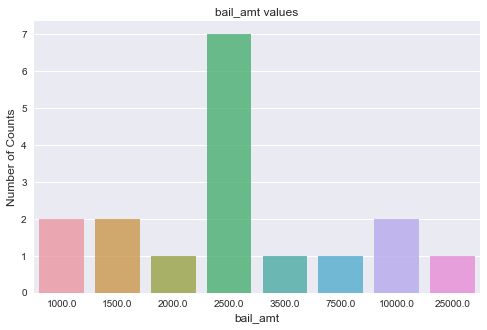

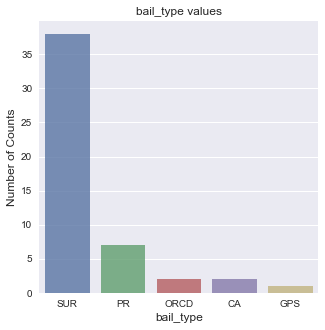

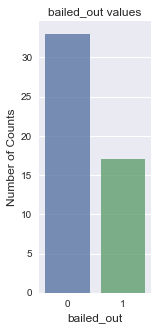

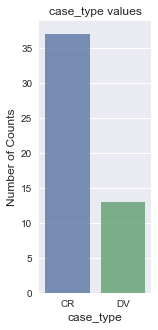

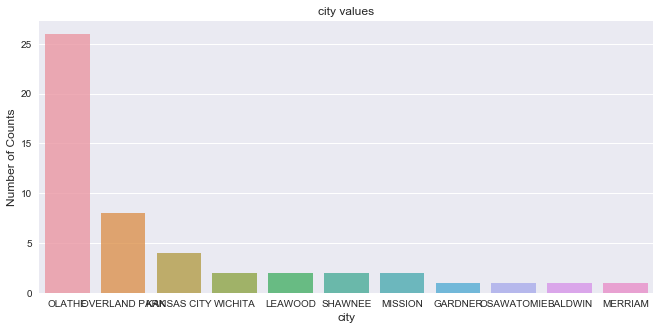

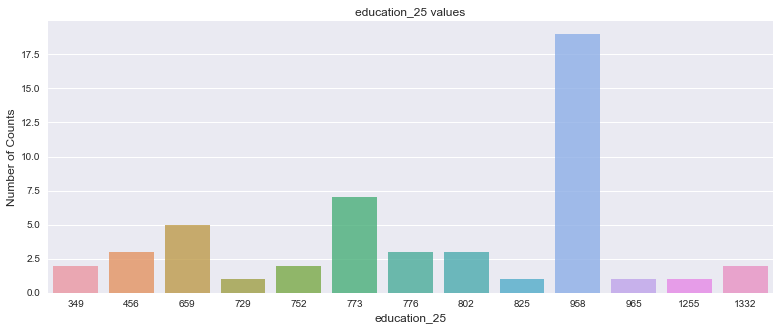

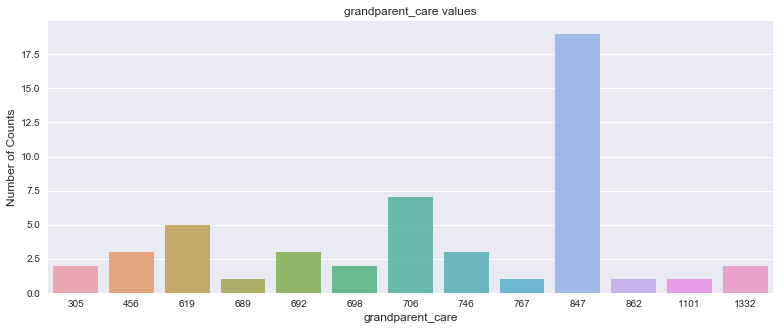

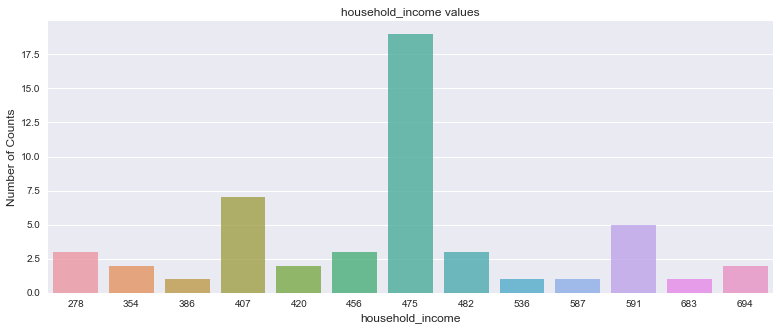

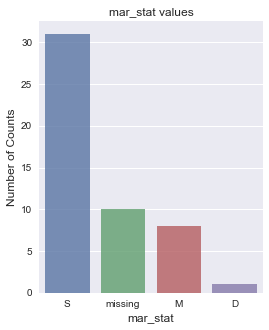

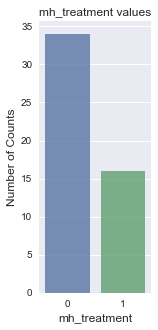

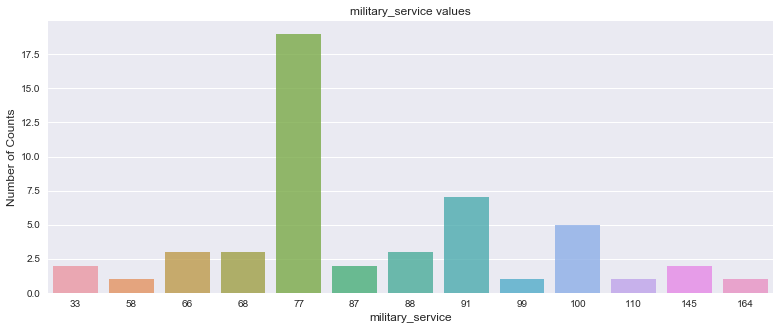

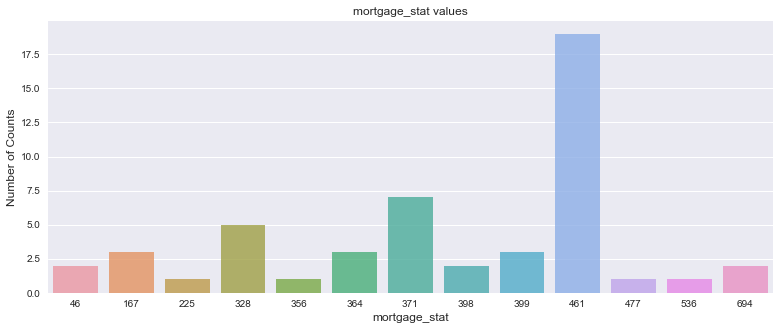

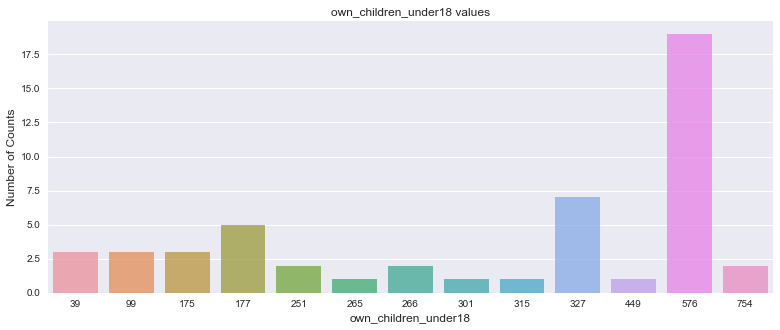

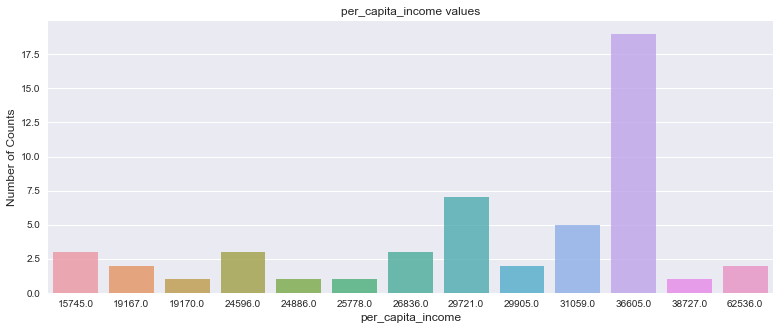

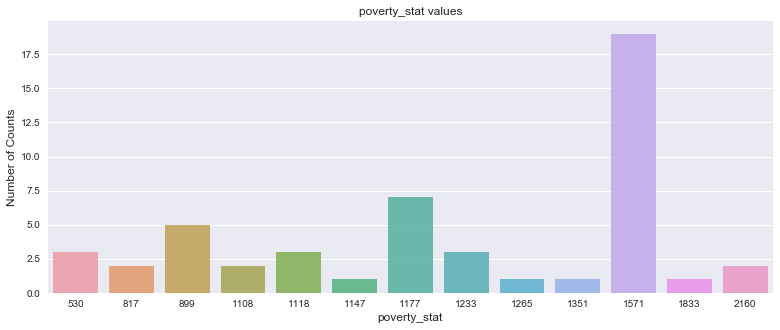

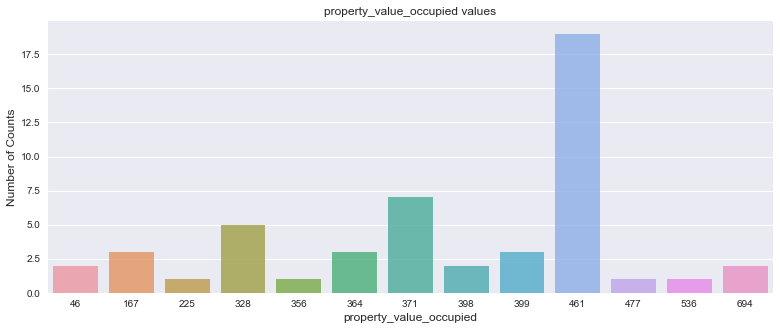

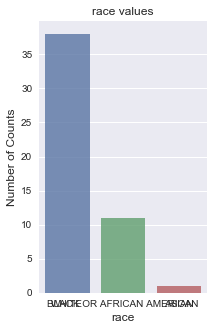

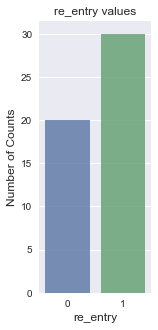

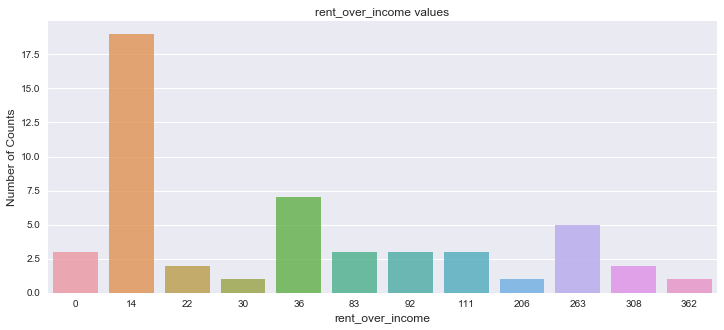

In [34]:
plot_df(RF_df[:50], tianchuslist , save=False)

In [ ]:
RF_df.columns

In [33]:
tianchuslist = ['bail_amt', 'bail_type', 'bailed_out',
        'case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry',
         'rent_over_income']

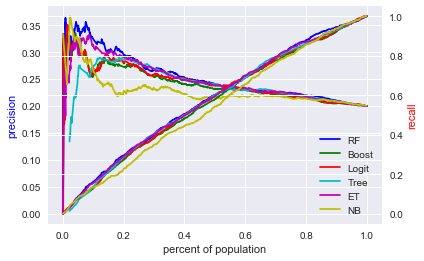

In [18]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. age_bin1 (0.068317)
2. sexFEMALE (0.054688)
3. sexMALE (0.052719)
4. mar_statS (0.049024)
5. age_bin4 (0.048321)
6. age_bin2 (0.046728)
7. mar_statM (0.046003)
8. age_bin3 (0.045085)
9. raceBLACK OR AFRICAN AMERICAN (0.041381)
10. raceWHITE (0.041137)
11. mar_statmissing (0.036962)
12. mar_statD (0.031692)
13. per_capita_income_bin1 (0.018948)
14. school_enrollment_16-19_bin3 (0.016675)
15. rent_over_income_bin2 (0.015883)
16. rent_over_income_bin3 (0.015678)
17. per_capita_income_bin3 (0.015549)
18. military_service_bin3 (0.015491)
19. school_enrollment_16-19_bin4 (0.015403)
20. per_capita_income_bin2 (0.015077)


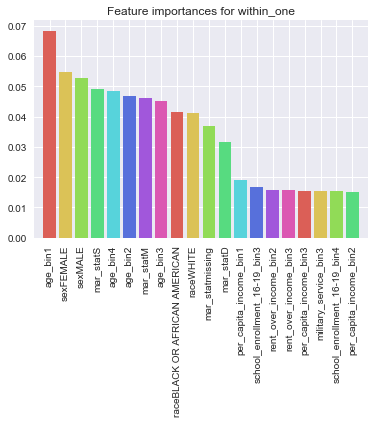

In [21]:
final_plot.feature_importance(x_train, y_train['within_one'], best,"ET",20)

In [13]:
list(x_train.columns)

['SSI_income_bin1',
 'SSI_income_bin2',
 'SSI_income_bin3',
 'SSI_income_bin4',
 'age_bin1',
 'age_bin2',
 'age_bin3',
 'age_bin4',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION SCHOOL SECURITY',
 'arresting_agencySHAWNEE P.D.',
 'arresting_agencySPRING HILL P.D.',
 'arresting_agencyWESTWOOD P.D.',
 'arresting_agency_typeCITY',
 'arresting_agency_typeCOUNTY PARK DISTRICT',
 'arresting_agency_typeCOUNTY SHERIFF',
 'arresting_agency_typeOTHER AGEN